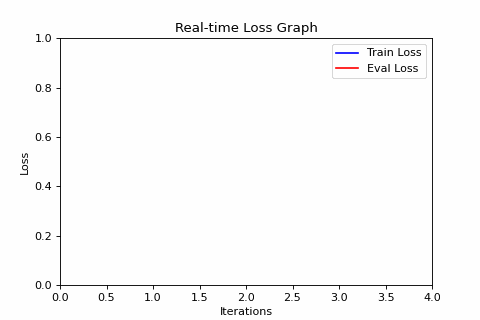

<Figure size 640x480 with 0 Axes>

In [1]:
from model import LeNet
from utils import *
import torch
from torch.utils.data import DataLoader
from dataset import MyDataset
import torch.optim as optim
from torch.utils.data import DataLoader
from criterion import criterion

opt = parse_opt()

# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LeNet(opt.n_classes).to(device)

if opt.is_trained:
    # 저장된 체크포인트 파일 경로
    load_model(model, opt.checkpoint)


# optimizer
optimizer = optim.Adam(model.parameters(), lr=opt.lr)

# load datasets
train_dataset = MyDataset(train=True)
test_dataset = MyDataset(train=False)

train_dataloader = DataLoader(train_dataset, batch_size=opt.batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=opt.batch_size, shuffle=True)

CEcriterion = criterion()

train_loop(opt, model, train_dataloader, test_dataloader, optimizer, CEcriterion , device)
